In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df= pd.read_csv('BlackFriday.csv')


In [3]:
df.head()

del df['Product_Category_2']
del df['Product_Category_3']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [8]:
df['User_ID'].nunique()

5891

In [9]:
df['Product_ID'].nunique()

3623

In [11]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [12]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [14]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [15]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [16]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [17]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [20]:
df['Purchase'].sum()/len(df['Purchase'])

9333.859852635065

In [25]:
for column in df.columns:
    print(column,':', df[column].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


## Analysing gender

<Axes: ylabel='Ratio'>

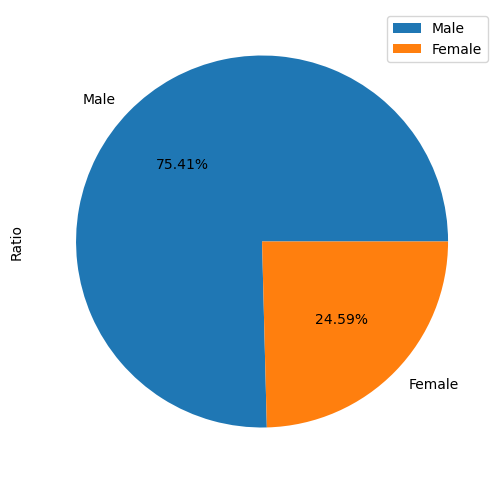

In [21]:
data= pd.DataFrame({'Ratio':[len(df[df['Gender']=='M']), len(df[df['Gender']=='F'])]}, index=['Male','Female'])
data.plot.pie(y='Ratio', figsize=(6,7), autopct="%.2f%%")

<Axes: title={'center': 'Gender ratio'}>

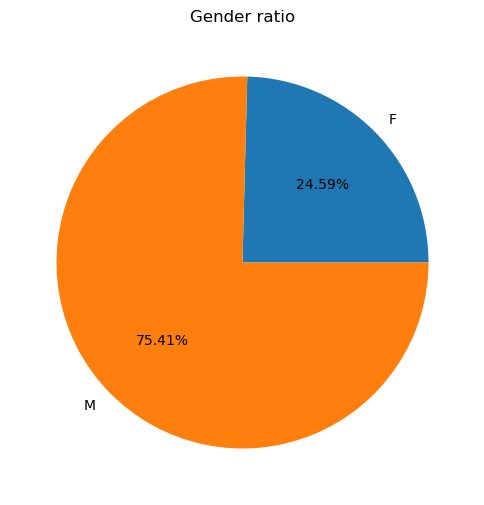

In [13]:
df.groupby('Gender').size().plot(kind='pie', autopct="%.2f%%",
                                title='Gender ratio',
                                figsize=(6,7))

In [ ]:
df.groupby('Gender').sum()['Purchase']

<Axes: title={'center': 'Purchase distribution by age'}, xlabel='Age'>

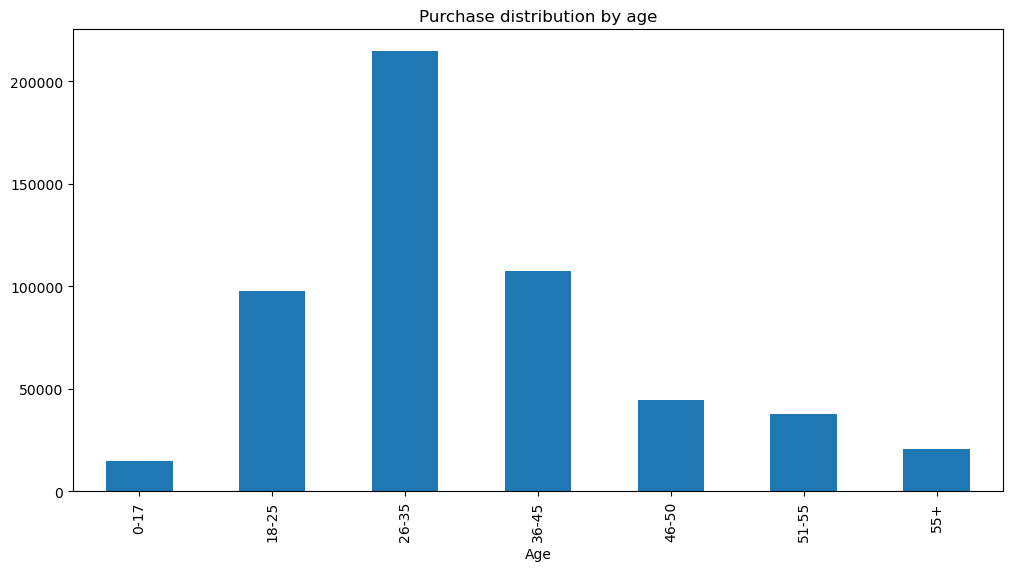

In [10]:
df.groupby('Age').size().plot(kind='bar', figsize=(12,6), title='Purchase distribution by age')

In [4]:
lst=[]
for i in df['Age'].unique():
    lst.append([i, df[df['Age']== i]['Product_ID'].nunique()])

data= pd.DataFrame(lst, columns=['Age', 'products'])
data

,Age,products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


In [21]:
df[df['Age']== i]['Product_ID'].nunique()

3213

<Axes: title={'center': 'Purchase Distribution by age'}, xlabel='Age'>

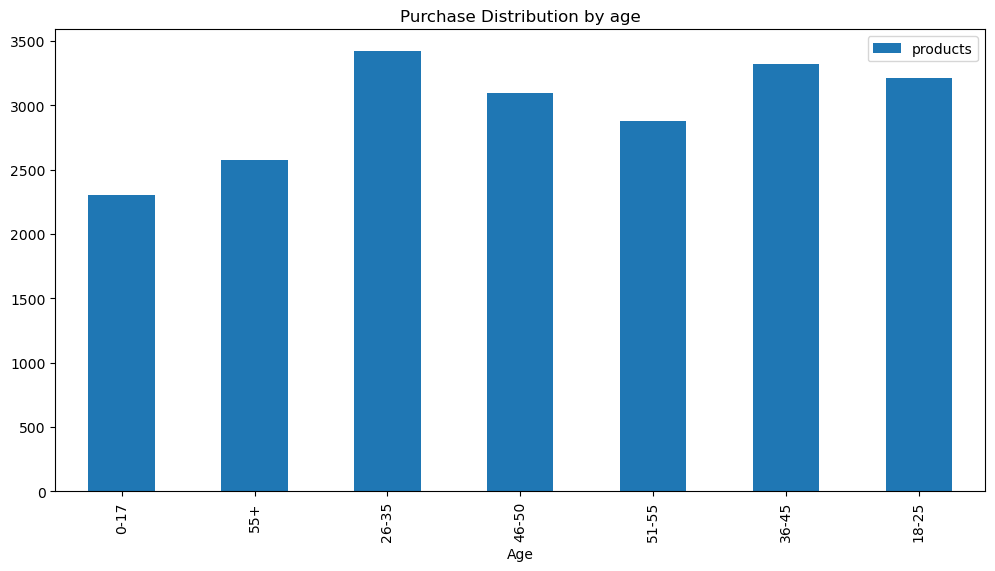

In [6]:
data.plot.bar(x='Age', figsize=(12,6), title='Purchase Distribution by age')

<Axes: title={'center': 'Amount spent by age'}, xlabel='Age'>

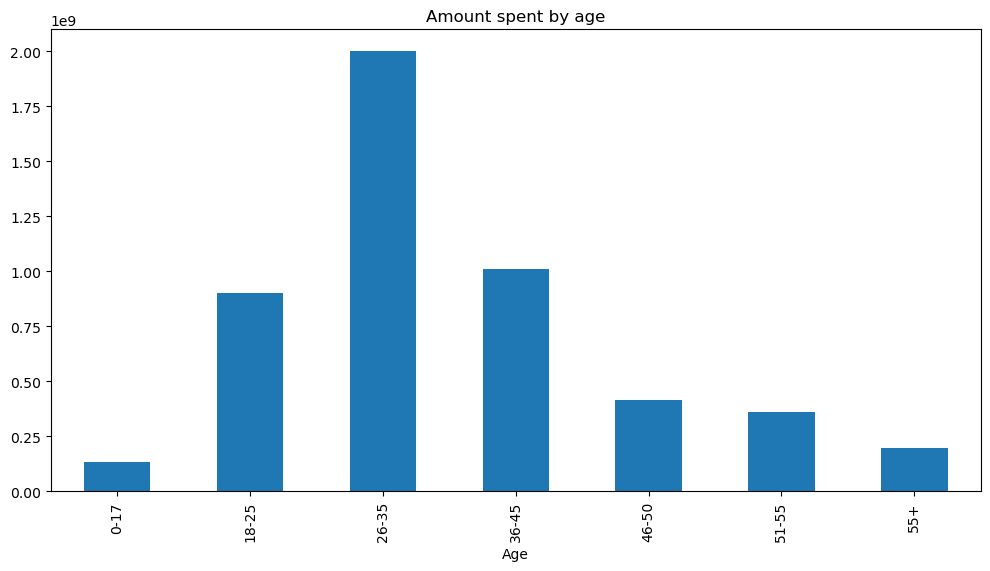

In [9]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar', figsize=(12,6), title='Amount spent by age')

In [4]:
df.groupby('Age').mean()['Purchase'].plot(kind='bar', figsize=(12,6), title='Amount spent by age'

SyntaxError: incomplete input (3729399912.py, line 1)

<Axes: >

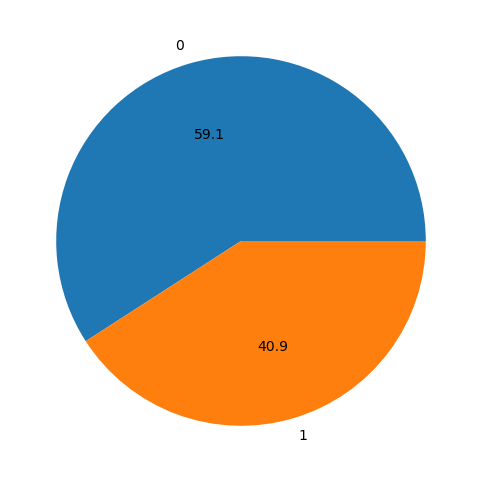

In [14]:
df.groupby('Marital_Status').size().plot(kind='pie', figsize=(12,6), autopct="%.1f")

<Axes: >

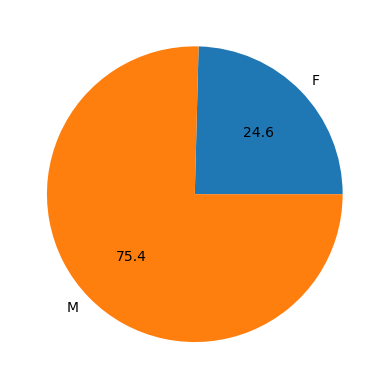

In [17]:
df.groupby('Gender').size().plot(kind='pie', autopct="%.1f")

<Axes: xlabel='Age', ylabel='count'>

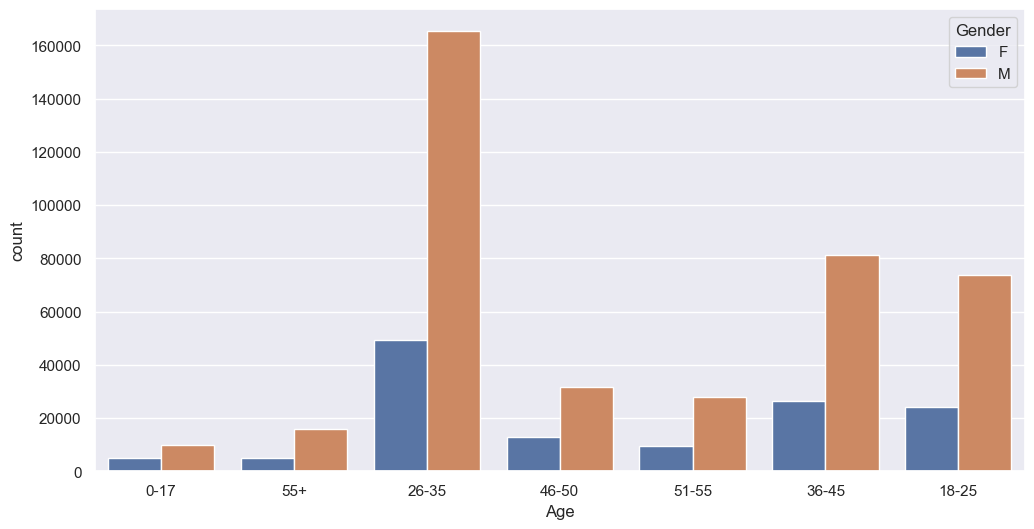

In [19]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Age', hue='Gender', data=df)

<Axes: xlabel='Gender', ylabel='count'>

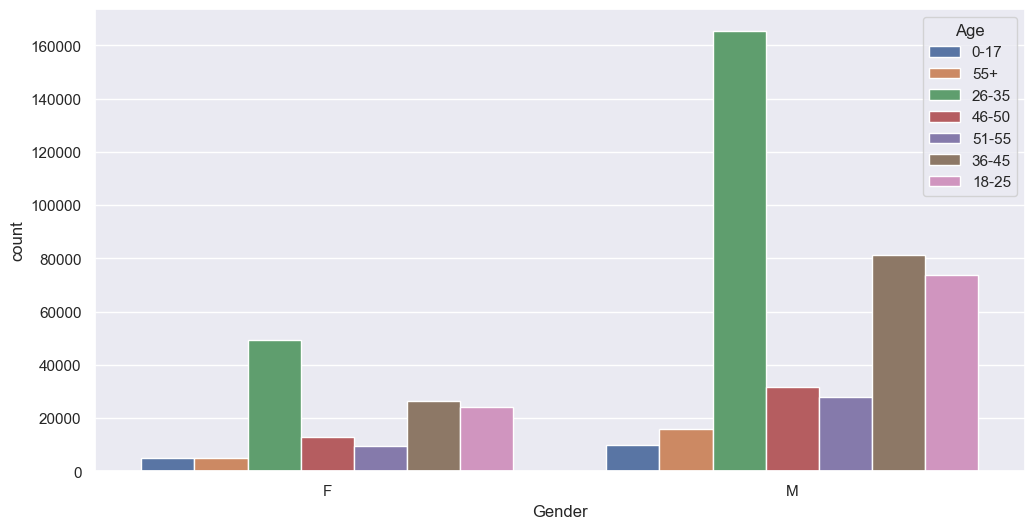

In [20]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Gender', hue='Age', data=df)

<Axes: xlabel='Gender', ylabel='count'>

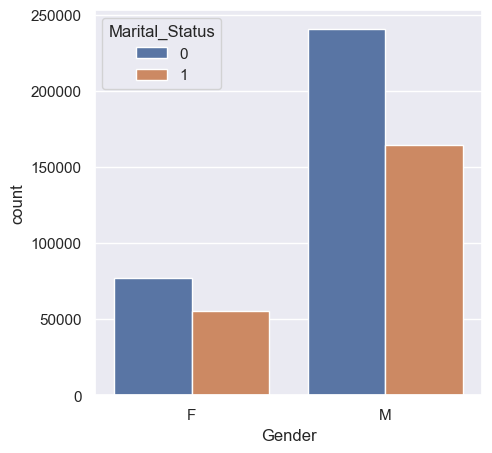

In [23]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x='Gender', hue='Marital_Status', data=df)

<Axes: xlabel='Marital_Status', ylabel='count'>

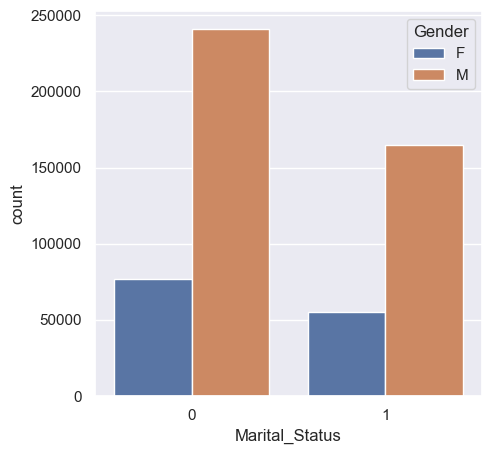

In [24]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x='Marital_Status', hue='Gender', data=df)

<Axes: xlabel='City_Category', ylabel='count'>

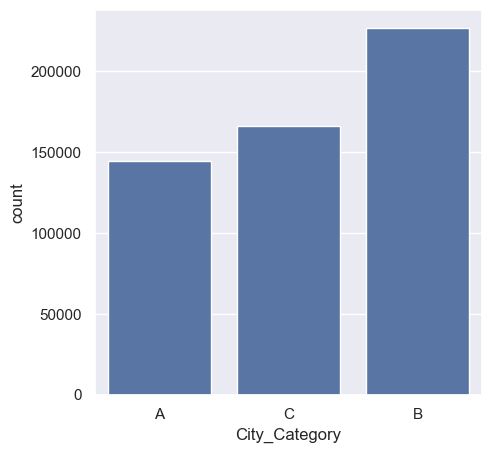

In [26]:
sns.countplot(x=df['City_Category'])

<Axes: xlabel='City_Category', ylabel='count'>

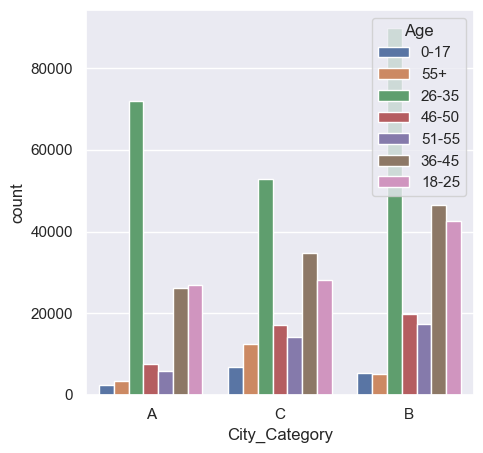

In [30]:
sns.countplot(x='City_Category', hue='Age', data=df)

<Axes: xlabel='Marital_Status', ylabel='count'>

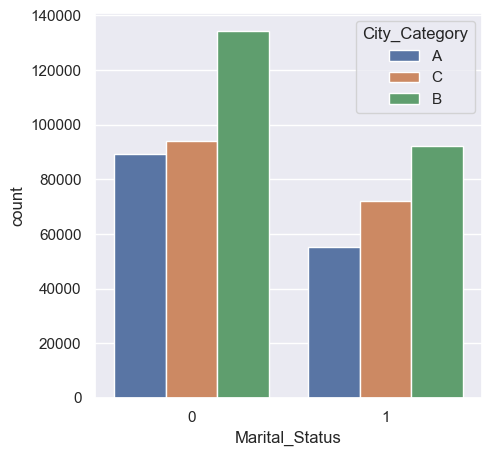

In [31]:
sns.countplot(x='Marital_Status', hue='City_Category', data=df)

<Axes: >

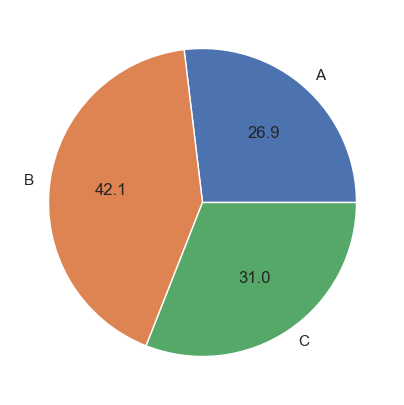

In [29]:
df.groupby('City_Category').size().plot(kind='pie', autopct="%.1f")

<Axes: xlabel='City_Category', ylabel='count'>

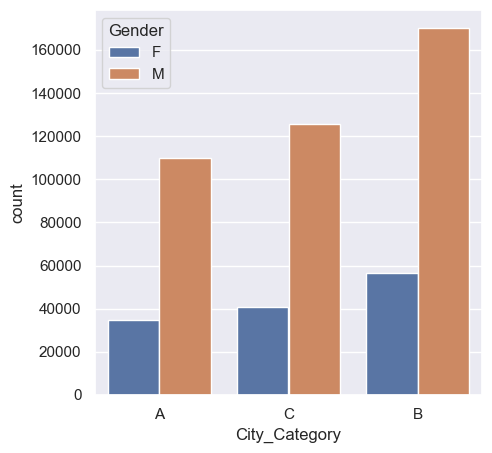

In [32]:
sns.countplot(x='City_Category', hue='Gender', data=df)

<Axes: ylabel='Purchase'>

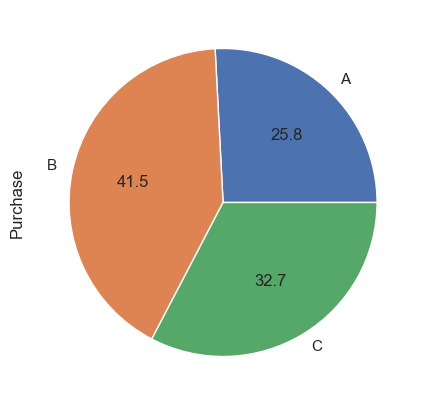

In [33]:
df.groupby('City_Category').sum()['Purchase'].plot(kind='pie', autopct="%.1f")

## Occupation and product analysis

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

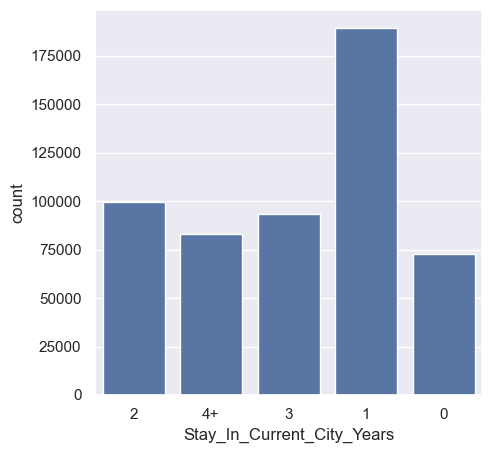

In [35]:
sns.countplot(x='Stay_In_Current_City_Years',  data=df)

<Axes: >

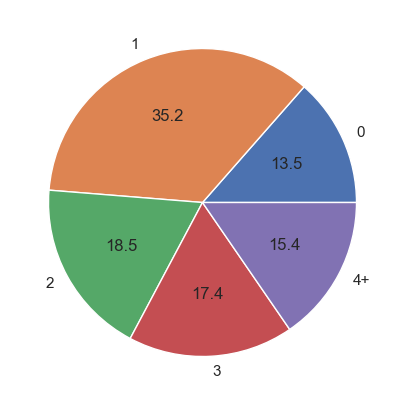

In [42]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind='pie', autopct='%.1f')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

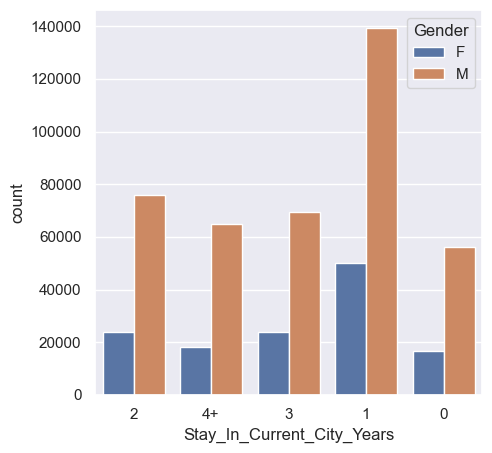

In [37]:
sns.countplot(x='Stay_In_Current_City_Years', hue='Gender', data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

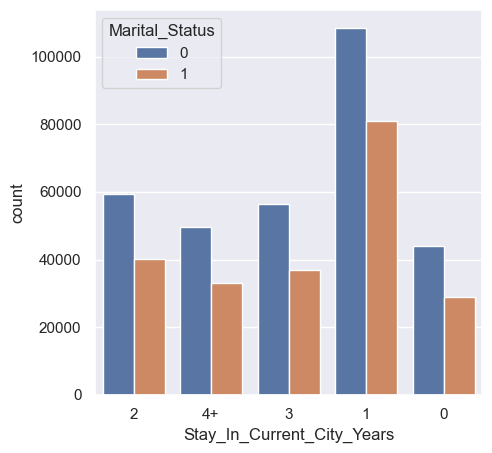

In [38]:
sns.countplot(x='Stay_In_Current_City_Years', hue='Marital_Status', data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

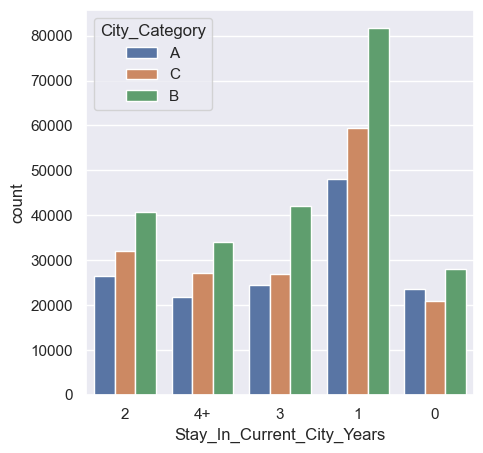

In [39]:
sns.countplot(x='Stay_In_Current_City_Years', hue='City_Category', data=df)

<Axes: xlabel='City_Category', ylabel='count'>

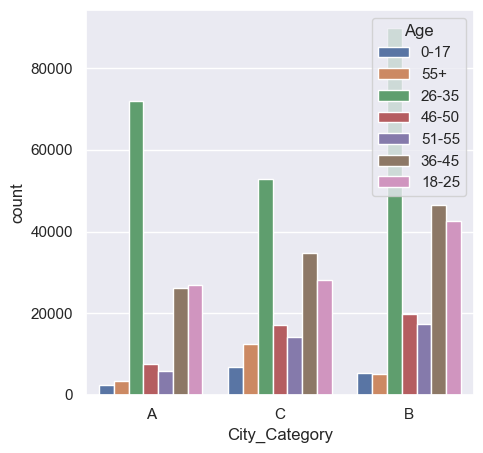

In [40]:
sns.countplot(x='City_Category', hue='Age', data=df)

<Axes: xlabel='Stay_In_Current_City_Years'>

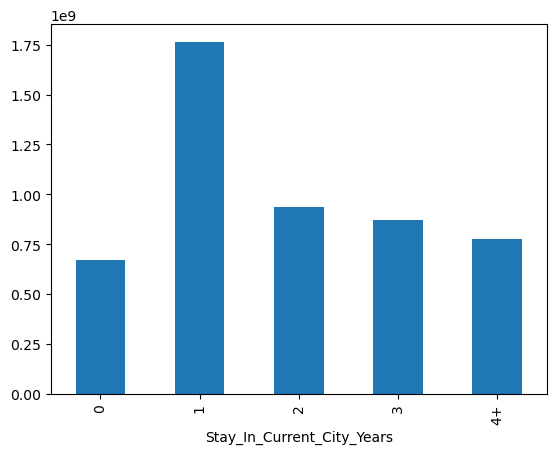

In [5]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind='bar')

<Axes: xlabel='Occupation', ylabel='count'>

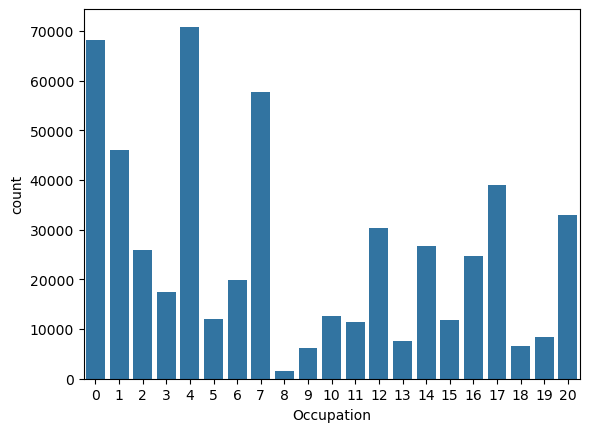

In [6]:
sns.countplot(x='Occupation', data=df)

<Axes: xlabel='Occupation'>

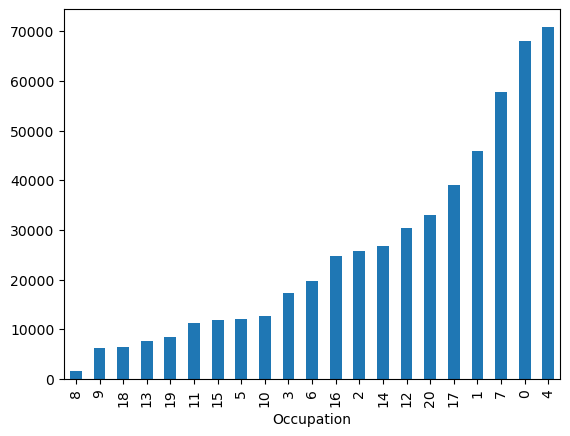

In [9]:
df.groupby('Occupation').size().sort_values().plot(kind='bar')

In [3]:
df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind='bar'

SyntaxError: incomplete input (4105423507.py, line 1)

<Axes: xlabel='Occupation', ylabel='count'>

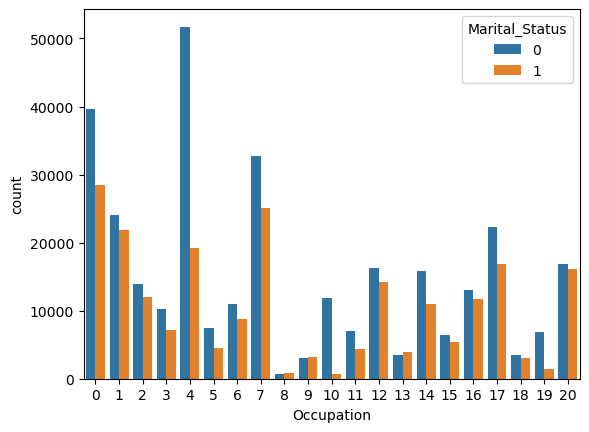

In [12]:
sns.countplot(x='Occupation', hue='Marital_Status', data=df)

<Axes: xlabel='Occupation', ylabel='count'>

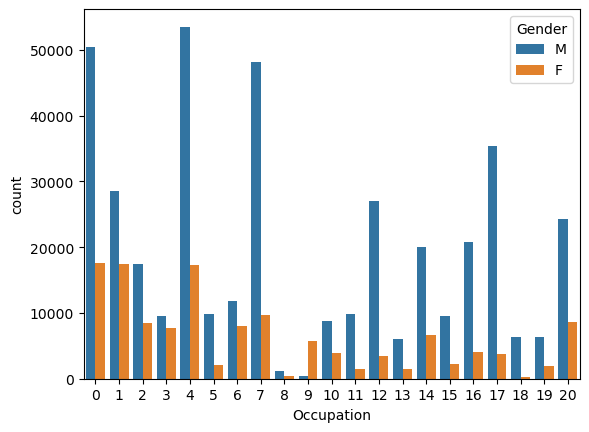

In [13]:
sns.countplot(x='Occupation', hue='Gender', data=df)

<Axes: xlabel='Occupation'>

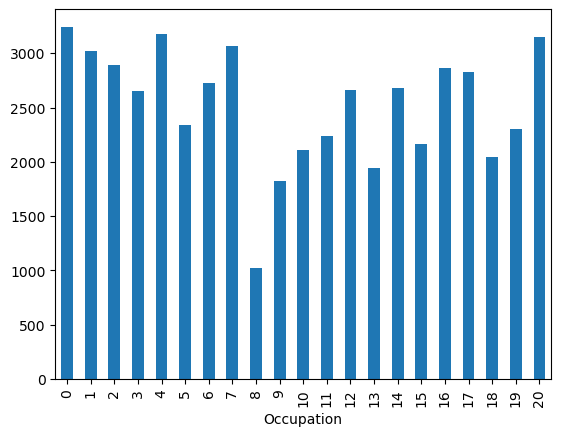

In [15]:
df.groupby('Occupation').nunique()['Product_ID'].plot(kind='bar')

<Axes: xlabel='Occupation'>

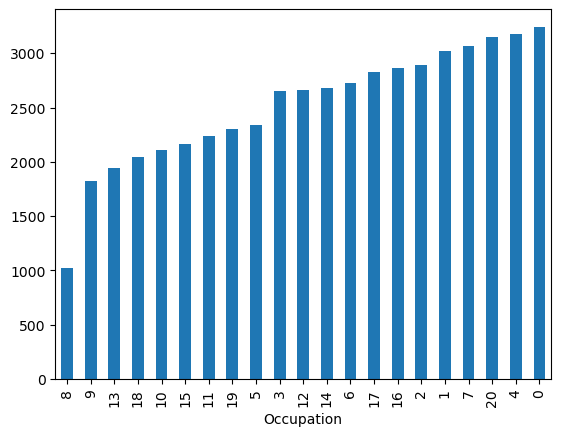

In [16]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

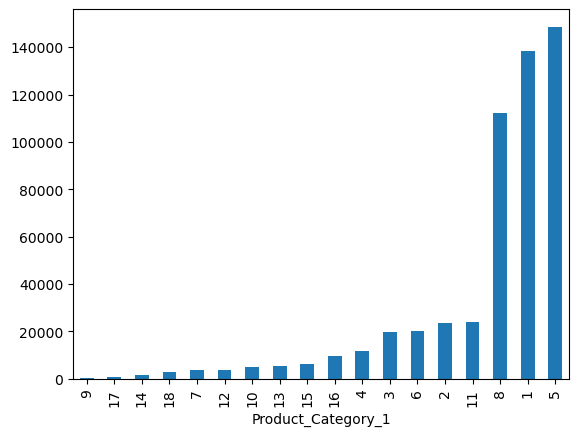

In [17]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')

In [ ]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind='bar')

<Axes: xlabel='Product_ID'>

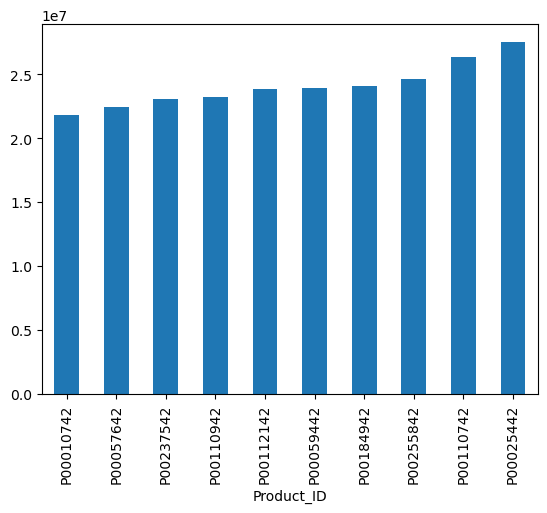

In [18]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind='bar')

<Axes: xlabel='Product_ID'>

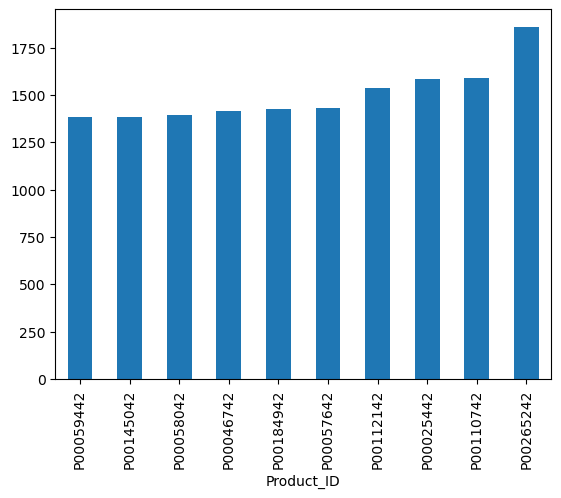

In [19]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind='bar')

In [20]:
df.groupby('Product_ID').mean()['Purchase'].nlargest(10).sort_values().plot(kind='bar')

TypeError: agg function failed [how->mean,dtype->object]

<Axes: xlabel='Product_Category_1', ylabel='count'>

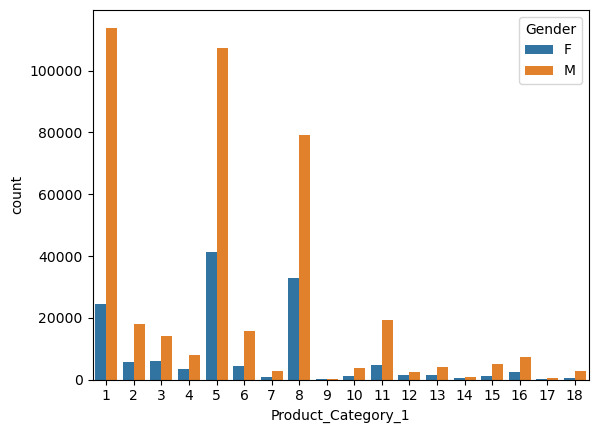

In [21]:
sns.countplot(x='Product_Category_1', hue='Gender', data=df)